In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fn_reviews = "tw_tainan_reviews.csv"
fn_restos = "tw_tainan_restos.csv"

data_reviews = pd.read_csv(fn_reviews)
data_restos = pd.read_csv(fn_restos)

In [3]:
data_restos.head()

,StoreId,CompleteStoreName,FoodType,AverageRating,Reviewers,City
0,zodj,廟口勝鹽水雞（光明店）,小吃,4.8,(100+),tainan
1,wzoh,自在軒 (台南東平店),台式,4.9,(100+),tainan
2,u5qk,夫妻肺片麻辣鍋 (台南東和店),台式,4.6,(100+),tainan
3,oiwb,嚥舐麻辣鴨血 (台南東安店),中式,4.8,(100+),tainan
4,x5os,大肥鴨料理店,台式,4.7,(1000+),tainan


### StoreId is a primary key

In [4]:
print(f'Unique storeId : {len(data_restos.StoreId.unique())} , number of rows {len(data_restos.StoreId)}')

Unique storeId : 3127 , number of rows 3127


### Categories of food

In [5]:
data_restos.FoodType.unique()

array(['小吃', '台式', '中式', '歐美', '日式', '飲料', '甜點', '咖啡', '健康餐', '異國', '港式',
       '韓式', '東南亞', '素食', '早餐'], dtype=object)

Translating the food type into english

In [6]:
def chinese_to_english_food_type(col):
        if col == "小吃":
            return "Snack/Street food"
        elif col == "台式":
            return "Taiwanese"
        elif col == "中式":
            return "Chinese"
        elif col == "飲料":
            return "Drink"
        elif col == "甜點":
            return "Pastry"
        elif col == "咖啡":
            return "Coffee"
        elif col == "健康餐":
            return "Healthy food"
        elif col == "異國":
            return "Exotic"
        elif col == "港式":
            return "Hong Kong style Dim Sum (snack)"
        elif col == "韓式":
            return "Korean"
        elif col == "東南亞":
            return "Southeast Asian"
        elif col == "素食":
            return "Vegetarian"
        elif col == "早餐":
            return "Breakfast"
        else:
            return "Other"

In [7]:
data_restos['FoodTypeEng'] = data_restos.FoodType.apply(chinese_to_english_food_type)

In [8]:
data_restos.head()

,StoreId,CompleteStoreName,FoodType,AverageRating,Reviewers,City,FoodTypeEng
0,zodj,廟口勝鹽水雞（光明店）,小吃,4.8,(100+),tainan,Snack/Street food
1,wzoh,自在軒 (台南東平店),台式,4.9,(100+),tainan,Taiwanese
2,u5qk,夫妻肺片麻辣鍋 (台南東和店),台式,4.6,(100+),tainan,Taiwanese
3,oiwb,嚥舐麻辣鴨血 (台南東安店),中式,4.8,(100+),tainan,Chinese
4,x5os,大肥鴨料理店,台式,4.7,(1000+),tainan,Taiwanese


### How is distributed the types of food

In [9]:
data_restos[['Count']] = 0
resto_type_counts = data_restos[['FoodTypeEng', 'Count']].groupby('FoodTypeEng').count().reset_index()
resto_type_counts

,FoodTypeEng,Count
0,Breakfast,157
1,Chinese,80
2,Coffee,40
3,Drink,336
4,Exotic,12
5,Healthy food,68
6,Hong Kong style Dim Sum (snack),33
7,Korean,46
8,Other,417
9,Pastry,232


Text(0.5, 1.0, 'Count per food type')

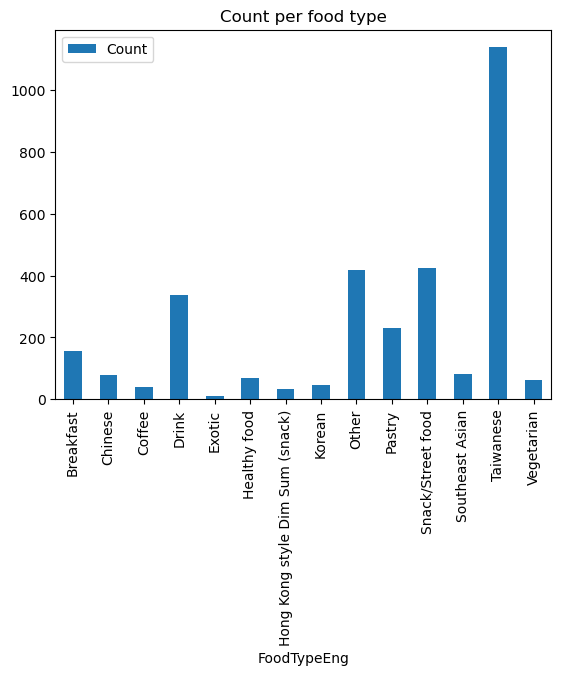

In [10]:
ax = resto_type_counts.plot.bar(x='FoodTypeEng')
ax.set_title('Count per food type')

### Exploring the review dataset

In [11]:
data_reviews.head()

,StoreId,uuid,createdAt,updatedAt,text,isAnonymous,reviewerId,replies,likeCount,isLiked,overall,restaurant_food,rider
0,b9at,000070d0-14b9-4e65-b1be-ceb6f347406d,2023-10-17T05:04:48Z,2023-10-17T05:04:48Z,好好吃啊,False,twook9cx,[],0,False,5,5,NaN
1,u446,000340e6-94ca-4ccb-8adb-4b5007554767,2024-02-21T09:32:04Z,2024-02-21T09:32:04Z,必點豬排蛋炒飯 非常好吃，很喜歡！超推薦！,False,twmiv0fs,[],0,False,5,5,NaN
2,hgyg,00054e83-10e4-441f-8ccc-022edb2e01f4,2023-08-28T07:16:42Z,2023-08-28T07:16:42Z,炸排骨餐盒裡面怎麼沒有炸排骨？,False,00054e83-10e4-441f-8ccc-022edb2e01f4,[],0,False,1,1,NaN
3,ajjd,00062ac2-073d-4f4e-b382-492c9a8c0636,2023-11-20T23:57:27Z,2023-11-20T23:57:27Z,不錯吃 又很香,False,tw09qzfc,[],0,False,5,5,5.0
4,z3ui,0007634a-81a3-40bd-9ac2-4326dbf25cd1,2023-08-23T06:35:29Z,2023-08-23T06:35:29Z,希望麵可以在硬一點,False,twrs6wh2,[],0,False,4,4,NaN


In [12]:
data_restos['AverageRating'].describe()

count    3127.000000
mean        4.730029
std         0.328479
min         1.000000
25%         4.700000
50%         4.800000
75%         4.900000
max         5.000000
Name: AverageRating, dtype: float64

(array([  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   3.,   4.,   0.,
          2.,   0.,   3.,   0.,  10.,   0.,   5.,   0.,   1.,   0.,   0.,
          5.,   0.,   3.,   0.,   4.,   0.,   8.,   0.,  10.,   0.,  11.,
          0.,  27.,   0.,  27.,   0.,  30.,  49.,   0.,  68.,   0., 129.,
          0., 240.,   0., 510.,   0., 818.,   0., 760., 391.]),
 array([1.        , 1.05333333, 1.10666667, 1.16      , 1.21333333,
        1.26666667, 1.32      , 1.37333333, 1.42666667, 1.48      ,
        1.53333333, 1.58666667, 1.64      , 1.69333333, 1.74666667,
        1.8       , 1.85333333, 1.90666667, 1.96      , 2.01333333,
        2.06666667, 2.12      , 2.17333333, 2.22666667, 2.28      ,
        2.33333333, 2.38666667, 2.44      , 2.49333333, 2.54666667,
        2.6       , 2.65333333, 2.70666667, 2.76      , 2.81333333,
        2.866666

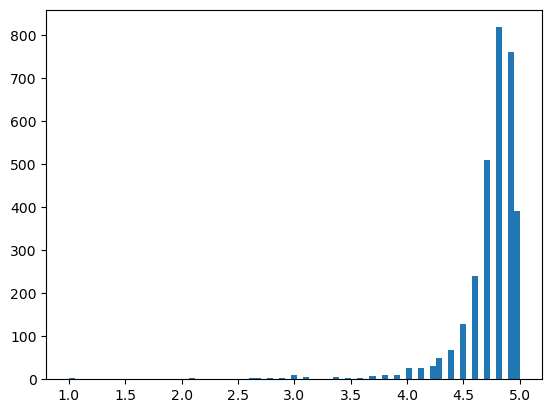

In [13]:
import matplotlib.pyplot as plt
plt.hist(data_restos['AverageRating'], bins=75)

In [14]:
# Percent of reviews with 5 stars
star_count1 = data_restos[ data_restos['AverageRating'] > 4.9 ].shape[0]
star_count2 = data_restos[ data_restos['AverageRating'] > 4.5 ].shape[0]
star_count3 = data_restos[ data_restos['AverageRating'] > 4.0 ].shape[0]


total_reviews = data_restos.shape[0]
print(f'Number of restaurants with average reviews > 4.9 stars : {star_count1} / {total_reviews} -> {np.around(star_count1/total_reviews,decimals=2)}%')
print(f'Number of restaurants with average reviews > 4.5 stars : {star_count2} / {total_reviews} -> {np.around(star_count2/total_reviews,decimals=2)}%')
print(f'Number of restaurants with average reviews > 4.0 stars : {star_count3} / {total_reviews} -> {np.around(star_count3/total_reviews,decimals=2)}%')

Number of restaurants with average reviews > 4.9 stars : 391 / 3127 -> 0.13%
Number of restaurants with average reviews > 4.5 stars : 2719 / 3127 -> 0.87%
Number of restaurants with average reviews > 4.0 stars : 3022 / 3127 -> 0.97%


## Number of reviews

In [15]:
data_restos['Reviewers'].describe()

count       3127
unique       108
top       (100+)
freq        1059
Name: Reviewers, dtype: object

In [16]:
data_restos['Reviewers'].unique()

array(['(100+)', '(1000+)', '(6)', '(11)', '(500+)', '(16)', '(4)',
       '(5000+)', '(37)', '(62)', '(7)', '(20)', '(63)', '(3000+)',
       '(30)', '(83)', '(2000+)', '(3)', '(84)', '(40)', '(74)', '(52)',
       '(25)', '(15)', '(26)', '(4000+)', '(77)', '(61)', '(17)', '(1)',
       '(46)', '(35)', '(42)', '(23)', '(10)', '(91)', '(67)', '(86)',
       '(18)', '(69)', '(10000+)', '(80)', '(5)', '(27)', '(41)', '(14)',
       '(53)', '(54)', '(2)', '(90)', '(50)', '(87)', '(9)', '(51)',
       '(93)', '(56)', '(85)', '(29)', '(38)', '(32)', '(36)', '(76)',
       '(97)', '(48)', '(58)', '(99)', '(47)', '(49)', '(64)', '(82)',
       '(89)', '(96)', '(24)', '(79)', '(94)', '(21)', '(45)', '(59)',
       '(39)', '(55)', '(19)', '(81)', '(13)', '(34)', '(72)', '(71)',
       '(65)', '(33)', '(44)', '(88)', '(43)', '(31)', '(92)', '(73)',
       '(28)', '(98)', '(8)', '(66)', '(60)', '(78)', '(75)', '(68)',
       '(100)', '(12)', '(57)', '(22)', '(95)', '(70)'], dtype=object)

## Number of reviews vs average rating

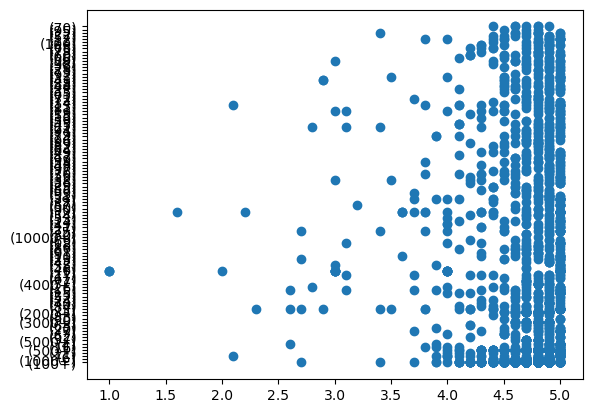

In [17]:
plt.scatter(data_restos['AverageRating'], data_restos['Reviewers'])

### Heatmap

In [18]:
data_reviews.columns

Index(['StoreId', 'uuid', 'createdAt', 'updatedAt', 'text', 'isAnonymous',
       'reviewerId', 'replies', 'likeCount', 'isLiked', 'overall',
       'restaurant_food', 'rider'],
      dtype='object')

In [19]:
tmp_df = data_reviews[['overall', 'restaurant_food']]
tmp_df

,overall,restaurant_food
0,5,5
1,5,5
2,1,1
3,5,5
4,4,4
...,...,...
52877,5,5
52878,5,5
52879,1,1
52880,1,1


In [20]:
tmp_df = tmp_df.corr()
tmp_df

,overall,restaurant_food
overall,1.0,1.0
restaurant_food,1.0,1.0


<AxesSubplot:>

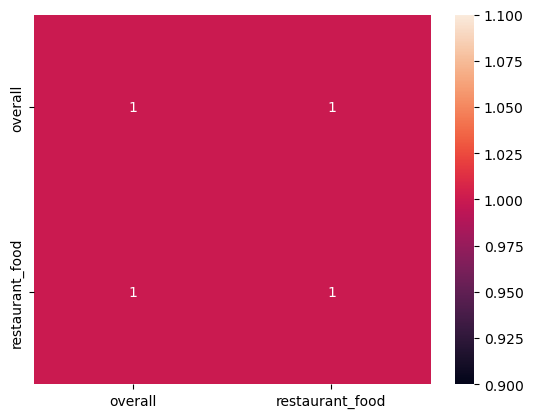

In [21]:
sns.heatmap(tmp_df, annot=True)

Column `restaurant food` and `overall` equals.

### Proportion of anonymous reviews 

In [22]:
n = data_reviews.shape[0]
anonymous_count = np.sum(data_reviews.isAnonymous.values)
anonymous_count

0

In [23]:
data_reviews[data_reviews["isAnonymous"] == True]

,StoreId,uuid,createdAt,updatedAt,text,isAnonymous,reviewerId,replies,likeCount,isLiked,overall,restaurant_food,rider


There is no anonymous reviews. This column is not useful.


### Like count

What are the top `liked` reviews ?

In [47]:
data_reviews.likeCount.describe()

count    52882.000000
mean         0.147820
std          0.446987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: likeCount, dtype: float64

In [29]:
data_reviews.head()

,StoreId,uuid,createdAt,updatedAt,text,isAnonymous,reviewerId,replies,likeCount,isLiked,overall,restaurant_food,rider
0,b9at,000070d0-14b9-4e65-b1be-ceb6f347406d,2023-10-17T05:04:48Z,2023-10-17T05:04:48Z,好好吃啊,False,twook9cx,[],0,False,5,5,NaN
1,u446,000340e6-94ca-4ccb-8adb-4b5007554767,2024-02-21T09:32:04Z,2024-02-21T09:32:04Z,必點豬排蛋炒飯 非常好吃，很喜歡！超推薦！,False,twmiv0fs,[],0,False,5,5,NaN
2,hgyg,00054e83-10e4-441f-8ccc-022edb2e01f4,2023-08-28T07:16:42Z,2023-08-28T07:16:42Z,炸排骨餐盒裡面怎麼沒有炸排骨？,False,00054e83-10e4-441f-8ccc-022edb2e01f4,[],0,False,1,1,NaN
3,ajjd,00062ac2-073d-4f4e-b382-492c9a8c0636,2023-11-20T23:57:27Z,2023-11-20T23:57:27Z,不錯吃 又很香,False,tw09qzfc,[],0,False,5,5,5.0
4,z3ui,0007634a-81a3-40bd-9ac2-4326dbf25cd1,2023-08-23T06:35:29Z,2023-08-23T06:35:29Z,希望麵可以在硬一點,False,twrs6wh2,[],0,False,4,4,NaN


In [41]:
data_reviews.sort_values(by=['likeCount'], ascending=False).head(5)

,StoreId,uuid,createdAt,updatedAt,text,isAnonymous,reviewerId,replies,likeCount,isLiked,overall,restaurant_food,rider
4186,j3gj,14830051-a927-4a7c-b8d2-d51dd6ed4a63,2023-04-10T14:44:27Z,2023-04-10T14:44:27Z,為何點麵必選選單裡面選麵需要加錢，米粉換飯它類不用錢這樣還算牛肉麵嗎？ 點了一碗牛肉麵結果還...,False,twivh9zm,[],15,False,3,3,4.0
48902,aw8s,ed14fa1c-e90c-4a6c-a6a2-4ea931a9e7d4,2023-05-03T18:27:07Z,2023-05-03T18:27:07Z,先說結論，我是盤子，同類型宵夜可以直接移駕禿頭老爹。\n首先老闆可能不太理解滑蛋的意思，\n...,False,ed14fa1c-e90c-4a6c-a6a2-4ea931a9e7d4,[],12,False,1,1,1.0
52675,l1ob,ff0252f8-3e86-47aa-960c-3d7494fae9df,2023-04-07T10:12:42Z,2023-04-07T10:12:42Z,竟然沒有主菜！全都是生菜！炸騙集團！圖文不符！,False,twlpq4cd,[],8,False,1,1,5.0
24402,dmsf,76517f28-cf85-479a-b25a-7c340096e9ba,2023-04-14T14:56:45Z,2023-04-14T14:56:45Z,肉比我阿公做完化療的頭髮還要少 不要點牛肉湯🙄,False,twzok7zn,[],8,False,1,1,3.0
3852,x5vt,12d17664-a90e-4691-8500-dd53947216f9,2023-07-11T05:06:01Z,2023-07-11T05:06:01Z,雞肉飯一份50塊還大份的\n這雞肉的量也太少了吧香油也沒很多\n要賺錢也不是這樣賺的吧,False,twpy4trs,[],7,False,1,1,NaN


Mean of the review ratings for the top liked comments, compared to the global average

In [42]:
top_5_mean = np.mean(data_reviews.sort_values(by=['likeCount'], ascending=False).head(5).overall)
top_10_mean = np.mean(data_reviews.sort_values(by=['likeCount'], ascending=False).head(10).overall)
top_20_mean = np.mean(data_reviews.sort_values(by=['likeCount'], ascending=False).head(20).overall)
mean_all = np.mean(data_reviews.overall)
print(f'Average ratings for the top five liked reviews : {top_5_mean}')
print(f'Average ratings for the top ten liked reviews : {top_10_mean}')
print(f'Average ratings for the top tweenty liked reviews : {top_20_mean}')
print(f'Average ratings for all dataset: {mean_all}')

Average ratings for the top five liked reviews : 1.4
Average ratings for the top ten liked reviews : 2.8
Average ratings for the top tweenty liked reviews : 3.75
Average ratings for all dataset: 3.996085624598162


The top most liked reviews tend to have a lower rating.

Text(0.5, 1.0, 'Count per food type')

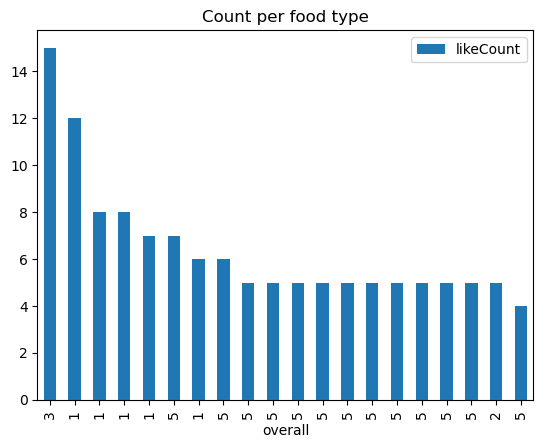

In [46]:
ax = data_reviews.sort_values(by=['likeCount'], ascending=False).head(20).plot.bar(y='likeCount', x='overall')
ax.set_title('Count per food type')

If we look at the distribution of the top 20 most liked reviews, we observe that the reviews having more than 5 `like` are likely to have lower rating, but this trend stops at 5 `like`.

#### How many reviews have 5 `like` ?

In [51]:
sub_data = data_reviews[ data_reviews.likeCount == 5]
count_5_liked = sub_data.shape[0]
mean_5_liked = np.mean(sub_data.overall)
print(f'{count_5_liked} have exactly 5 `likes`, with a rating mean of {mean_5_liked}')


11 have exactly 5 `likes`, with a rating mean of 4.7272727272727275
